In [1]:
import networkx as nx 
import pandas as pd 
  
df = pd.read_csv('extradata/userUserConnectionListInsideandBig.csv', delim_whitespace = True,  
                   header = None, names =['n1', 'n2', 'weight']) 
  
# G = nx.from_pandas_edgelist(df, 'n1', 'n2', edge_attr ='weight') 
  
# The Graph diagram does not show the edge weights.  
# However, we can get the weights by printing all the 
# edges along with the weights by the command below 
G = nx.DiGraph()
G.add_weighted_edges_from([tuple(x) for x in df.values])
G.edges()
# print(list(G.(data = True))) 

OutEdgeView([('wPrawopl', 'wPrawopl'), ('wSensie', 'Swiat_Rolnika'), ('Matka_Kurka', 'Matka_Kurka'), ('RadioZET_NEWS', 'grazwiatr'), ('RadioZET_NEWS', 'Gosc_RadiaZET'), ('FaktyTVN', 'TVN24BiS'), ('FaktyTVN', 'konkret24'), ('FaktyTVN', 'tvn24rozmowa'), ('FaktyTVN', 'tvnmeteo'), ('FaktyTVN', 'FaktyTVN'), ('FaktyTVN', 'tvn24'), ('konkret24', 'konkret24'), ('konkret24', 'tvn24'), ('tvn24', 'tvnwarszawa'), ('tvn24', 'TVN24BiS'), ('tvn24', 'konkret24'), ('tvn24', 'tvn24rozmowa'), ('tvn24', 'tvn24sport'), ('tvn24', 'tvnmeteo'), ('tvn24', 'tvn24'), ('tvn24', 'FaktyTVN'), ('rzeczpospolita', 'RPPrawo'), ('rzeczpospolita', 'RPEkonomia'), ('OnetWiadomosci', 'onetpl'), ('tvp_info', 'WiadomosciTVP'), ('tvp_info', 'tvp_info'), ('tvp_info', 'MZ_GOV_PL'), ('tvp_info', 'RadioZET_NEWS'), ('DemagogPL', 'konkret24')])

In [2]:
print("The various layout options are:") 
print([x for x in nx.__dir__() if x.endswith('_layout')]) 

The various layout options are:
['bipartite_layout', 'circular_layout', 'kamada_kawai_layout', 'random_layout', 'rescale_layout', 'shell_layout', 'spring_layout', 'spectral_layout', 'planar_layout', 'fruchterman_reingold_layout', 'spiral_layout']


In [3]:
junk = ['medialne','CrowdMedia_PL','dlapolski','Matka_Kurka','MediaNarodoweMN','niezaleznapl','PikioPL','RepublikaTV','wPrawopl','wSensie']
mainstream = ['wgospodarce','KRESYPL','bankier_pl','WiadomosciTVP','FaktyTVN','rzeczpospolita','OnetWiadomosci','Interia_Fakty','RadioZET_NEWS','natematpl','tvp_info','tvn24','gazeta_wyborcza','gazetapl_news']
factcheck = ['DemagogPL','konkret24','oko_press','demaskator24','AntyFakePL']
val_map = {}
color_map = []

for node in G.nodes():
    if node in junk:
        val_map[node] = 1
        color_map.append('orange')
    elif node in mainstream:
        val_map[node] = 2
        color_map.append('lightblue')
    elif node in factcheck:
        val_map[node] = 3
        color_map.append('greenyellow')
    else:
        val_map[node] = 4
        color_map.append('lightgray')


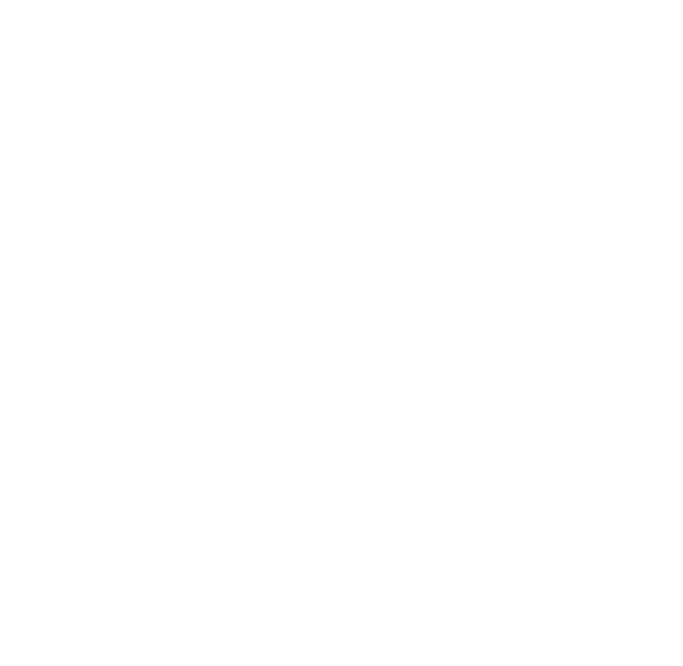

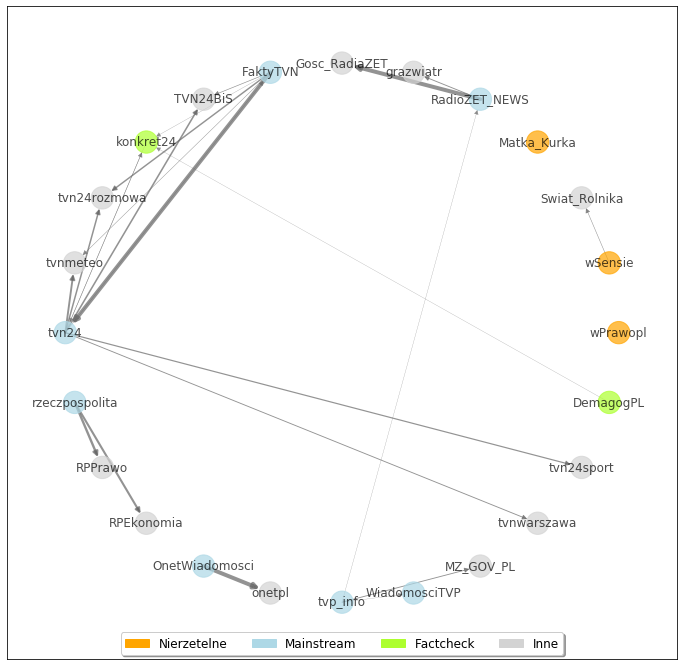

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# fixing the size of the figure 
plt.figure(figsize =(12, 12)) 
  

edge_width = [0.015 * G[u][v]['weight'] for u, v in G.edges()] 
# width of edge is a list of weight of edges 
for i, edge_w in enumerate(edge_width):
    if edge_w > 4:
        edge_width[i] = 4
    if edge_w <0.25:
        edge_width[i] = 0.25

    
plt.axis('off') 

plt.figure(figsize =(12, 12)) 
pos = nx.circular_layout(G)

mcp = nx.draw_networkx(G, pos, node_size=500,
                 node_color = color_map, 
                 alpha = 0.7,  
                 with_labels = True, 
                 width = edge_width,  
                 edge_color ='.4', cmap = plt.cm.Blues) 

# Legend
junk_patch = mpatches.Patch(color='orange', label='Nierzetelne')
mainstream_patch = mpatches.Patch(color='lightblue', label='Mainstream')
factcheck_patch = mpatches.Patch(color='greenyellow', label='Factcheck')
other_patch = mpatches.Patch(color='lightgray', label='Inne')
plt.legend(handles=[junk_patch, mainstream_patch, factcheck_patch, other_patch],
           fontsize=12,loc='upper center', bbox_to_anchor=(0.5, +0.05),
          fancybox=True, shadow=True, ncol=4)